In [6]:
import pandas as pd

# Charger votre dataset
file_path = r"C:\Users\yayaa\ESEO E5\Projet_DataIES\dpe03existant.xlsx"
df = pd.read_excel(file_path)

print(f"Nombre de lignes initial : {len(df)}")

# Retirer les lignes où methode_application_dpe contient "dpe appartement généré à partir des données DPE immeuble"
df = df[df['methode_application_dpe'] != 'dpe appartement généré à partir des données DPE immeuble']

print(f"Nombre de lignes après filtrage : {len(df)}")

# Liste des colonnes à conserver
colonnes_a_garder = [
    'type_batiment',
    'type_installation_chauffage',
    'type_installation_ecs',
    'hauteur_sous_plafond',
    'etiquette_dpe',
    'etiquette_ges',
    'surface_habitable_logement',
    'nombre_niveau_logement',
    'code_postal_ban',
    'qualite_isolation_enveloppe',
    'cout_total_5_usages_energie_n1',
    'conso_5 usages_ef',
    'conso_5_usages_ep',
    'type_energie_principale_chauffage'
]

# Filtrer le dataframe pour ne garder que ces colonnes
df_filtre = df[colonnes_a_garder]

# Sauvegarder le résultat en CSV
df_filtre.to_csv('DPE.csv', index=False)
df_filtre.to_excel('DPE.xlsx', index=False)


print(f"\nDataset filtré avec succès !")
print(f"Nombre de lignes final : {len(df_filtre)}")
print(f"Nombre de colonnes conservées : {len(df_filtre.columns)}")
print(f"\nAperçu des données :")
print(df_filtre.head())

Nombre de lignes initial : 10000
Nombre de lignes après filtrage : 8787

Dataset filtré avec succès !
Nombre de lignes final : 8787
Nombre de colonnes conservées : 15

Aperçu des données :
  type_batiment type_installation_chauffage type_installation_ecs  \
0   appartement                   collectif             collectif   
1   appartement                  individuel            individuel   
2   appartement                  individuel            individuel   
3        maison                         NaN                   NaN   
4   appartement                  individuel            individuel   

   hauteur_sous_plafond etiquette_dpe etiquette_ges  \
0                   2.5             D             D   
1                   2.5             E             B   
2                   2.8             D             D   
3                   2.3             D             B   
4                   2.5             D             B   

   surface_habitable_logement  nombre_niveau_logement  code_posta

In [15]:
import pandas as pd

# Charger uniquement le fichier CSV
print("="*60)
print("CHARGEMENT DU FICHIER CSV")
print("="*60)

df = pd.read_csv('DPE.csv')
print(f"DPE.csv charge : {len(df):,} lignes, {len(df.columns)} colonnes")
print("="*60)

# Analyse des valeurs manquantes
print("\n" + "="*60)
print("ANALYSE DES VALEURS MANQUANTES (NaN)")
print("="*60)

print("\nNombre de NaN par colonne :")
nan_count = df.isnull().sum()
print(nan_count)

print("\nPourcentage de NaN par colonne :")
nan_percentage = (df.isnull().sum() / len(df) * 100).round(2)
print(nan_percentage)

# Identifier les colonnes numériques et textuelles avec NaN
colonnes_numeriques_nan = df.select_dtypes(include=['float64', 'int64']).columns[df.select_dtypes(include=['float64', 'int64']).isnull().any()].tolist()
colonnes_textuelles_nan = df.select_dtypes(include=['object']).columns[df.select_dtypes(include=['object']).isnull().any()].tolist()

print("\nColonnes NUMERIQUES avec NaN :")
print(colonnes_numeriques_nan)

print("\nColonnes TEXTUELLES avec NaN :")
print(colonnes_textuelles_nan)

print(f"\nNombre total de lignes avec au moins un NaN : {df.isnull().any(axis=1).sum():,}")
print(f"Nombre de lignes completes (sans NaN) : {df.dropna().shape[0]:,}")
print("="*60)

# ==========================================
# GESTION DES NaN
# ==========================================
print("\n" + "="*60)
print("TRAITEMENT DES VALEURS MANQUANTES")
print("="*60)

df_clean = df.copy()

# Pour les colonnes numériques : remplacer par la MOYENNE
# Certaines colonnes doivent être arrondies à l'entier
colonnes_entieres = ['nombre_niveau_logement', 'code_postal_ban']

for col in colonnes_numeriques_nan:
    moyenne = df_clean[col].mean()
    
    # Si la colonne doit être entière, on arrondit
    if col in colonnes_entieres:
        moyenne_arrondie = round(moyenne)
        df_clean[col] = df_clean[col].fillna(moyenne_arrondie)
        print(f"{col} : NaN remplaces par la moyenne arrondie ({moyenne_arrondie})")
    else:
        df_clean[col] = df_clean[col].fillna(moyenne)
        print(f"{col} : NaN remplaces par la moyenne ({moyenne:.2f})")

# Pour les colonnes textuelles : OPTION B - Remplacer par le mode
for col in colonnes_textuelles_nan:
    mode = df_clean[col].mode()[0] if not df_clean[col].mode().empty else 'Inconnu'
    df_clean[col] = df_clean[col].fillna(mode)
    print(f"{col} : NaN remplaces par le mode ('{mode}')")

print("="*60)

# Vérification finale
print("\n" + "="*60)
print("RESULTAT APRES GESTION DES NaN")
print("="*60)
print(f"Lignes avant nettoyage : {len(df):,}")
print(f"Lignes apres nettoyage : {len(df_clean):,}")
print(f"NaN restants : {df_clean.isnull().sum().sum()}")
print("="*60)

# Sauvegarder le dataset nettoyé
df_clean.to_csv('DPE_clean.csv', index=False)
df_clean.to_excel('DPE_clean.xlsx', index=False)

print("\n" + "="*60)
print("FICHIERS SAUVEGARDES")
print("="*60)
print("DPE_clean.csv")
print("DPE_clean.xlsx")
print("="*60)

CHARGEMENT DU FICHIER CSV
DPE.csv charge : 8,787 lignes, 15 colonnes

ANALYSE DES VALEURS MANQUANTES (NaN)

Nombre de NaN par colonne :
type_batiment                           0
type_installation_chauffage          3811
type_installation_ecs                3811
hauteur_sous_plafond                    0
etiquette_dpe                           0
etiquette_ges                           0
surface_habitable_logement             77
nombre_niveau_logement                 80
code_postal_ban                        73
qualite_isolation_enveloppe             0
cout_total_5_usages_energie_n1          0
conso_5 usages_ef                       0
conso_5_usages_ep                       0
type_energie_n1                         0
type_energie_principale_chauffage       0
dtype: int64

Pourcentage de NaN par colonne :
type_batiment                         0.00
type_installation_chauffage          43.37
type_installation_ecs                43.37
hauteur_sous_plafond                  0.00
etiquette_dpe  

In [18]:
import pandas as pd

df = pd.read_csv('DPE_clean.csv')

print(f"Lignes : {len(df)}")
print(f"Colonnes : {len(df.columns)}")

# Voir les NaN par ligne
nb_nan_par_ligne = df.isnull().sum(axis=1)

print(f"\nLignes avec NaN : {(nb_nan_par_ligne > 0).sum()}")
print(f"Lignes sans NaN : {(nb_nan_par_ligne == 0).sum()}")

# Remplir les NaN ligne par ligne
df_clean = df.copy()

for col in df.columns:
    if df[col].dtype in ['float64', 'int64']:
        # Numériques : moyenne
        df_clean[col].fillna(df[col].mean(), inplace=True)
    else:
        # Texte : mode
        df_clean[col].fillna(df[col].mode()[0], inplace=True)

print(f"\nLignes avec NaN après traitement : {df_clean.isnull().any(axis=1).sum()}")

df_clean.to_csv('DPE_Finale.csv', index=False)
print("Fichier sauvegardé")


Lignes : 8787
Colonnes : 15

Lignes avec NaN : 0
Lignes sans NaN : 8787

Lignes avec NaN après traitement : 0
Fichier sauvegardé


In [19]:
import pandas as pd

df = pd.read_excel('DPE_clean.xlsx')

print(f"Lignes : {len(df)}")
print(f"Colonnes : {len(df.columns)}")

# Voir les NaN par ligne
nb_nan_par_ligne = df.isnull().sum(axis=1)

print(f"\nLignes avec NaN : {(nb_nan_par_ligne > 0).sum()}")
print(f"Lignes sans NaN : {(nb_nan_par_ligne == 0).sum()}")

# Remplir les NaN ligne par ligne
df_clean = df.copy()

for col in df.columns:
    if df[col].dtype in ['float64', 'int64']:
        # Numériques : moyenne
        df_clean[col].fillna(df[col].mean(), inplace=True)
    else:
        # Texte : mode
        df_clean[col].fillna(df[col].mode()[0], inplace=True)

print(f"\nLignes avec NaN après traitement : {df_clean.isnull().any(axis=1).sum()}")

df_clean.to_excel('DPE_Finale.xlsx', index=False)
print("Fichier sauvegardé")


Lignes : 8787
Colonnes : 15

Lignes avec NaN : 0
Lignes sans NaN : 8787

Lignes avec NaN après traitement : 0
Fichier sauvegardé


In [37]:
import pandas as pd

# Charger le fichier Excel
df = pd.read_csv("DPE.csv")

# Normaliser la colonne pour éviter les problèmes de majuscules, minuscules ou espaces
df["type_batiment"] = df["type_batiment"].str.strip().str.lower()

# Supprimer les lignes où type_batiment est "immeuble"
df_clean = df[df["type_batiment"] != "immeuble"]

# Vérification rapide
print("Répartition des types de bâtiment après nettoyage :")
print(df_clean["type_batiment"].value_counts())

# Sauvegarder le dataset nettoyé
df_clean.to_csv("DPE.csv", index=False)



Répartition des types de bâtiment après nettoyage :
type_batiment
appartement    4898
maison         3810
Name: count, dtype: int64
Fichier sauvegardé : DPE.xlsx 


Q1 : 9525.4
Q3 : 25605.15
IQR : 16079.750000000002
Borne inférieure : -14594.225000000004
Borne supérieure : 49724.77500000001
Valeur minimale : 1405.2
Valeur maximale : 145420.6


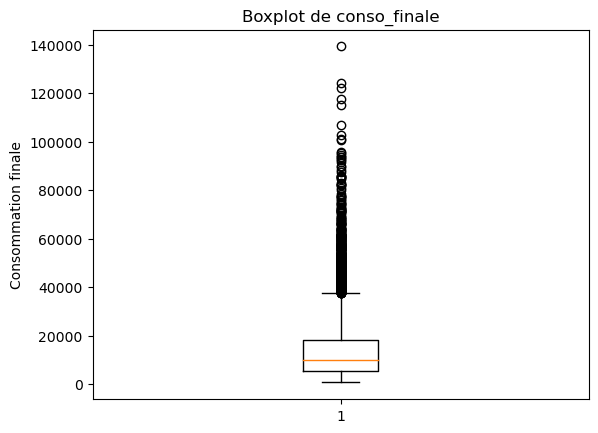

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('DPE.xlsx')

Q1 = df["conso_primaire"].quantile(0.25)
Q3 = df["conso_primaire"].quantile(0.75)
IQR = Q3 - Q1

borne_inf = Q1 - 1.5 * IQR
borne_sup = Q3 + 1.5 * IQR

print("Q1 :", Q1)
print("Q3 :", Q3)
print("IQR :", IQR)
print("Borne inférieure :", borne_inf)
print("Borne supérieure :", borne_sup)

print("Valeur minimale :", df["conso_primaire"].min())
print("Valeur maximale :", df["conso_primaire"].max())


plt.boxplot(df["conso_finale"].dropna())
plt.title("Boxplot de conso_finale")
plt.ylabel("Consommation finale")
plt.show()


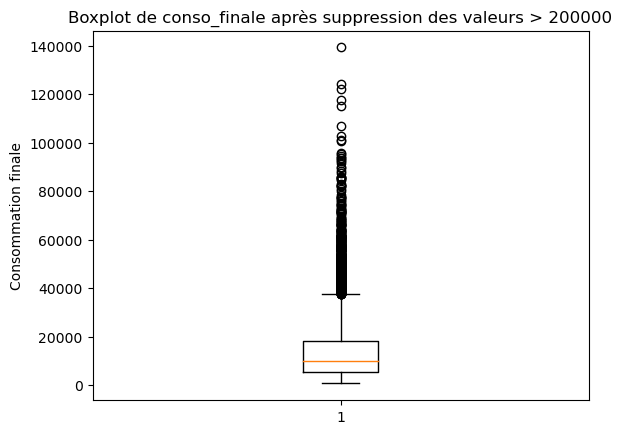

Dataset nettoyé sauvegardé 
Valeur minimale : 611.0
Valeur maximale : 139319.9


In [60]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger le dataset
df = pd.read_csv('DPE.csv')

# Supprimer les lignes où conso_finale > 200 000
df_clean = df[df["conso_finale"] <= 150_000].copy()



# Boxplot après suppression
plt.boxplot(df_clean["conso_finale"].dropna())
plt.title("Boxplot de conso_finale après suppression des valeurs > 200000")
plt.ylabel("Consommation finale")
plt.show()

# Option : sauvegarder le dataset nettoyé
df_clean.to_csv("DPE.csv", index=False)
print("Dataset nettoyé sauvegardé ")

print("Valeur minimale :", df["conso_finale"].min())
print("Valeur maximale :", df["conso_finale"].max())

In [63]:
import pandas as pd

# Charger le dataset
df = pd.read_csv("DPE.csv")  # ou read_csv

# Mettre à 1 dans nombre_niveau_logement si type_batiment == "appartement"
df.loc[df["type_batiment"] == "appartement", "nombre_niveau_logement"] = 1

# Vérification : afficher quelques lignes modifiées
print(df[df["type_batiment"] == "appartement"][["type_batiment", "nombre_niveau_logement"]].head())

# Option : sauvegarder le dataset modifié
df.to_csv("DPE.csv", index=False)
print("Dataset mis à jour ")


  type_batiment  nombre_niveau_logement
0   appartement                     1.0
1   appartement                     1.0
2   appartement                     1.0
4   appartement                     1.0
5   appartement                     1.0
Dataset mis à jour 
